In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
# Define the features and target variable
X = data[['bedrooms', 'bathrooms','sqft_living','sqft_lot','floors','condition','sqft_above','sqft_basement']]  # Features
y = data['price']  # Target (house price)



In [4]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [6]:
# Display model coefficients (weights assigned to each feature)
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                Coefficient
bedrooms      -68309.654564
bathrooms     -12546.128520
sqft_living      216.188946
sqft_lot          -0.545185
floors         51505.280702
condition      57349.952366
sqft_above        83.507605
sqft_basement    132.681341


In [7]:
# Example: Predict price for a house with 3 bedrooms, 1500 sq feet, built in 2010
# new_house = np.array([[3, 1340, 1955]])
new_house = np.array([[3, 1.50,1340,7912,1.5,3,1340,0]])
# Use the model to predict the price
predicted_price = model.predict(new_house)

print(f'The predicted price for the house is: ${predicted_price[0]:.2f}')


The predicted price for the house is: $302708.95


/home/sparkm/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [10]:
def GetHousePrice(bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, sqft_above, sqft_basement):
    new_house = np.array([[bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, sqft_above, sqft_basement]])
    predicted_price = model.predict(new_house)
    return predicted_price[0]

print("Get House Price Based On The Features")
a = int(input("Enter the number of bedrooms: "))
b = float(input("Enter the number of bathrooms: "))
c = int(input("Enter the square footage of the living area: "))
d = int(input("Enter the square footage of the lot: "))
e = float(input("Enter the number of floors: "))
f = int(input("Enter the condition of the house: "))
g = int(input("Enter the square footage of the above area: "))
h = int(input("Enter the square footage of the basement: "))
print(GetHousePrice(a,b,c,d,e,f,g,h))

Get House Price Based On The Features
429805.3149323381


/home/sparkm/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 989737379734.70
Root Mean Squared Error (RMSE): 994855.46
Mean Absolute Error (MAE): 219833.02
R² Score: 0.03


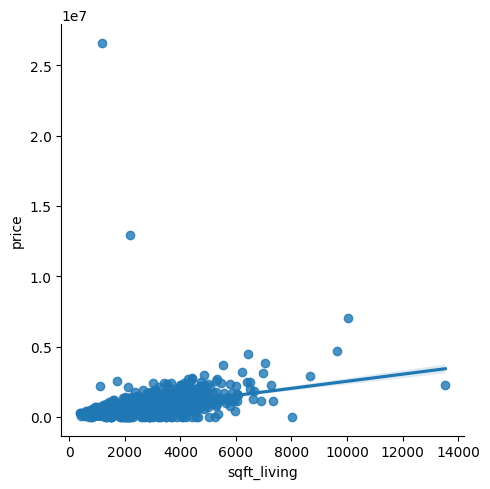

In [9]:
x = data['sqft_living']
y = data['price']

'''plt.scatter(x, y, alpha=0.5)
plt.title('Scatter plot of sqft_living vs price')
plt.xlabel('sqft_living')
plt.ylabel('price')

plt.show()''' # scatter plot

sns.lmplot(x='sqft_living', y='price', data=data)
